In [1]:
import pandas as pd
import numpy as np
import re
from ast import literal_eval

#### The columns cast and crew from the credits dataset is copied to the movies dataset

In [50]:
movies=pd.read_csv('C:/Users/Administrator/Desktop/Extra/shidhra tech/tmdb_5000_movies.csv').drop(['homepage','tagline'],axis=1)
movies=movies.dropna()
movies.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500


In [49]:
credits=pd.read_csv('C:/Users/Administrator/Desktop/Extra/shidhra tech/tmdb_5000_credits.csv')
credits=credits.dropna()
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [5]:
data=pd.merge(credits,movies,left_on='movie_id',right_on='id',how='right')
data.head(2)

,movie_id,title_x,cast,crew,budget,genres,id,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500


In [6]:
data.isnull().sum()

movie_id                0
title_x                 0
cast                    0
crew                    0
budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title_y                 0
vote_average            0
vote_count              0
dtype: int64

#### coverting the columns

In [7]:
data['cast']=data['cast'].apply(lambda x: literal_eval(x))
data['crew']=data['crew'].apply(lambda x: literal_eval(x))
data['genres']=data['genres'].apply(lambda x: literal_eval(x))
data['keywords']=data['keywords'].apply(lambda x: literal_eval(x))
data['production_companies']=data['production_companies'].apply(lambda x: literal_eval(x))
data['production_countries']=data['production_countries'].apply(lambda x: literal_eval(x))
data['spoken_languages']=data['spoken_languages'].apply(lambda x: literal_eval(x))

In [45]:
data.shape

(4799, 23)

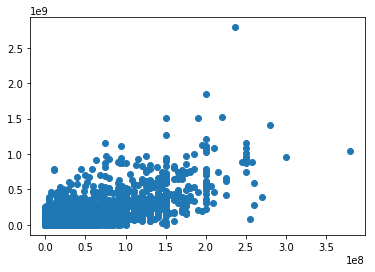

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data.budget,data.revenue)

In [27]:
data['cast'][0][0]['name']

'Sam Worthington'

In [ ]:
# data['cast_members']=0
# for i in range(len(data)):
#     names=[]
#     for j in range(len(data['cast'][i])):
#         name=data['cast'][i][j]['name']
#         names.append(name)
#     data['cast_members'][i]=names  

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [62]:
data.dtypes
numdata=movies[movies['revenue']!=0]
numdata=numdata[['budget','popularity','revenue','runtime','vote_average','vote_count']]
numdata.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124


In [63]:
numdata.shape

(3376, 6)

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,v_measure_score
from sklearn.model_selection import train_test_split

In [77]:
x=numdata.drop('revenue',axis=1)
y=numdata['revenue']
train_x,validate_x,train_y,validate_y=train_test_split(x,y,test_size=0.3,random_state=100)

In [85]:
le=LinearRegression()
le.fit(train_x,train_y)
pred=le.predict(validate_x)
print('R square %0.3f'% r2_score(validate_y,pred))
print('variance %0.3f'%v_measure_score(validate_y,pred))

R square 0.665
variance 0.999


In [86]:
list(zip(numdata.columns,le.coef_))

[('budget', 1.7030702211979531),
 ('popularity', 364923.8585231709),
 ('revenue', -128271.01901818304),
 ('runtime', 1905061.8497190883),
 ('vote_average', 58617.19737888469)]